# Redes Neurais
# Exercício 05
Fase Forward

# 1 - Implementação da classe Fase Forward

In [68]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import expit

def tanh(x):
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

class FaseForward(BaseEstimator, ClassifierMixin):
  def fit(self, X, y=None):
    self.inputW1 = [0.5, 0.1, 0.25]
    self.inputW2 = [0.1, 0.2, 0.1]
    self.inputW3 = [0.5, 0.3, 0.1]    
  def predict(self, X, y=None):
    X_b = np.hstack((np.ones((X.shape[0],1)),X))
    y_pred = []
    for k in X_b:
      z1 = np.sum(np.multiply(k, self.inputW1))
      z2 = np.sum(np.multiply(k, self.inputW2))
      new_in = [tanh(z1), tanh(z2)]
      hidden = np.insert(new_in, 0, 1)
      z3 = np.sum(np.multiply(hidden, self.inputW3))
      a3 = tanh(z3)
      y_pred = np.append(y_pred, a3)
    return y_pred

# 2 - Criação da Base e Plotagem dos Resultados

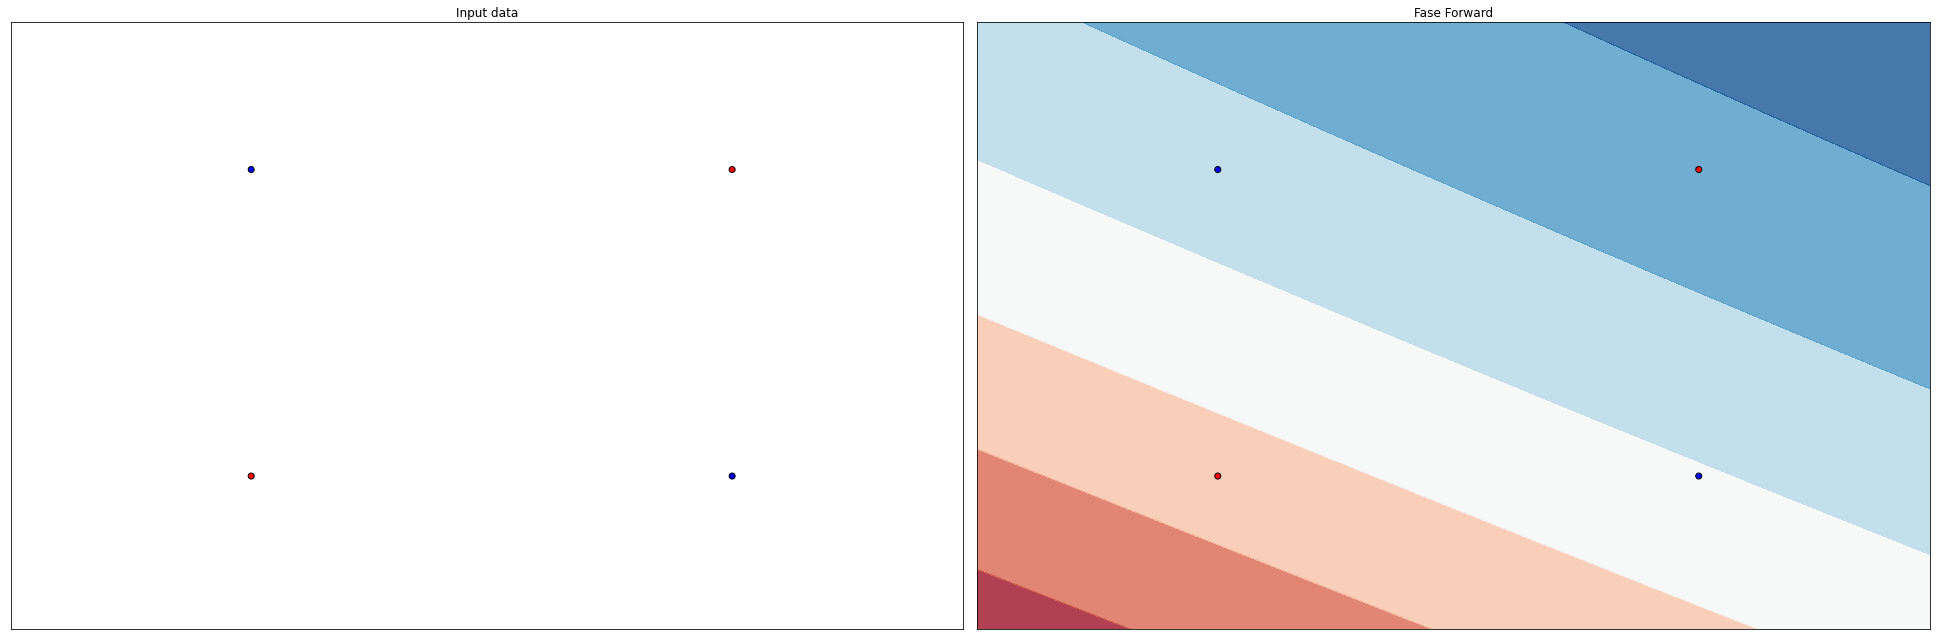

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

h = .02  # step size in the mesh

names = ["Fase Forward"]

classifiers = [
    FaseForward()]

# Criação da base
X1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y1 = np.array([0, 1, 1, 0])

base = (X1, y1)

datasets = [base]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterar as bases
for ds_cnt, ds in enumerate(datasets):
      
    X, y = ds

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plota a base
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plota os dados
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterae os classificadores
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, y)

        # plota os limites de decisão
        if hasattr(clf, "predict"):
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # plota com as cores
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # plota os pontos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
                   edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        i += 1

plt.tight_layout()
plt.show()
